# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [34]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn --upgrade
%matplotlib inline
sns.set(color_codes=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 741.8 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


## Loading the dataset

In [4]:
df = pd.read_csv("DATA/used_device_data.csv")

df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [5]:
df.shape

(3454, 15)

dataset has 15 columns and 3454 rows 

In [6]:
# checking column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

brand_name, os, 4g and 5g are categorical while all others are numerical data types

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [8]:
# Creating a copy to avoid changes in original data 
df = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [9]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Distribution of used and new phone normalized prices

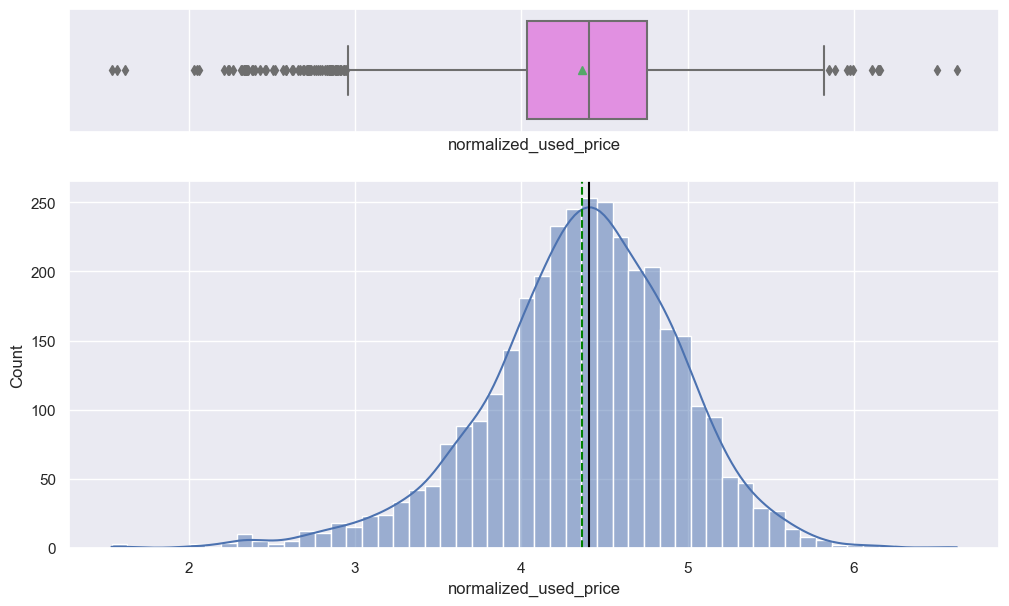

In [11]:
histogram_boxplot(df, "normalized_used_price", kde=True)

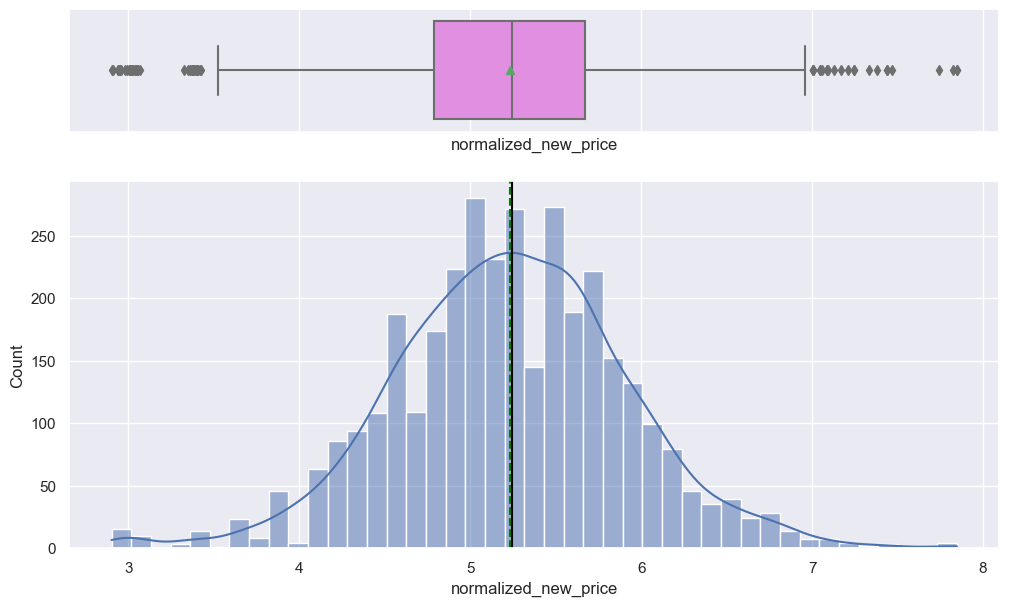

In [12]:
histogram_boxplot(df, "normalized_new_price", kde=True)

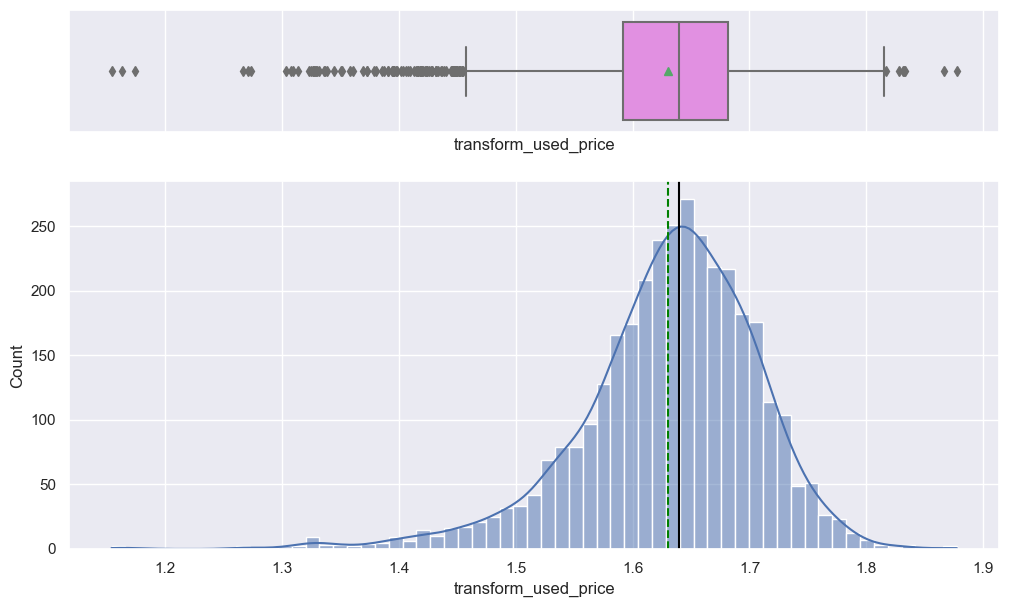

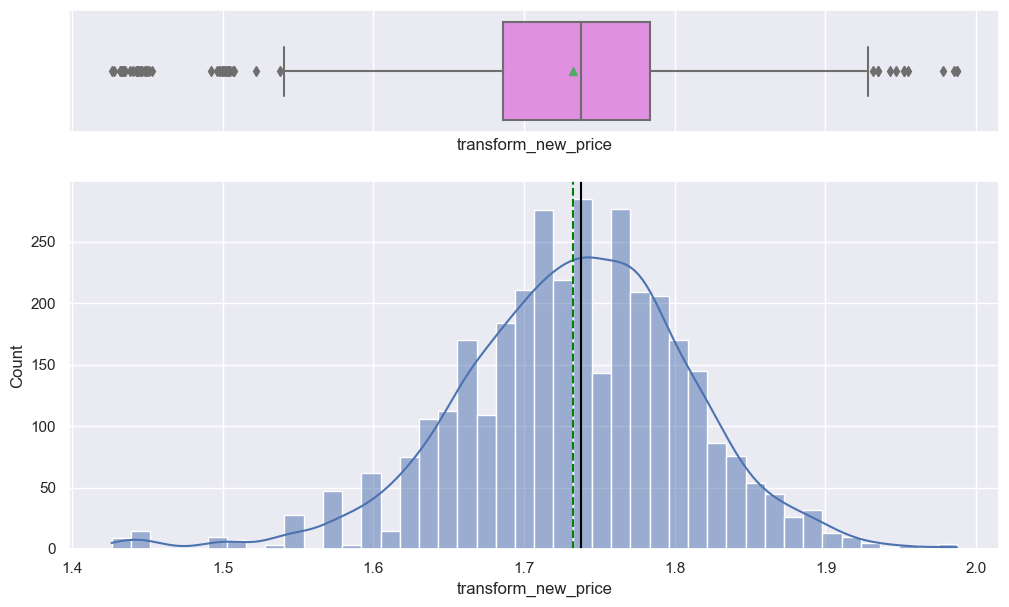

In [13]:
df["transform_used_price"] = np.cbrt(df["normalized_used_price"])
histogram_boxplot(df, "transform_used_price", kde=True)
plt.show()

df["transform_new_price"] = np.cbrt(df["normalized_new_price"])
histogram_boxplot(df, "transform_new_price", kde=True)

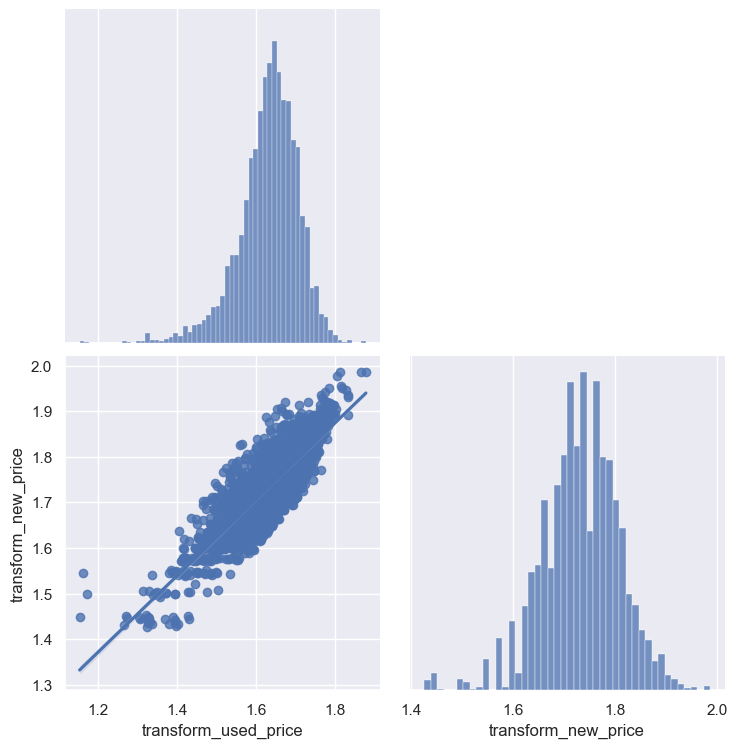

Linear correlation factor between cbrt(used_price) and cbrt(new_price) 0.84
Linear correlation factor between used_price and new_price 0.83


In [14]:
g = sns.pairplot(data = df[["transform_used_price","transform_new_price"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between cbrt(used_price) and cbrt(new_price)", \
      round(df.corr()["transform_used_price"]["transform_new_price"] , 2))
print("Linear correlation factor between used_price and new_price", \
      round(df.corr()["normalized_used_price"]["normalized_new_price"] , 2))

### Distribution of operating systems

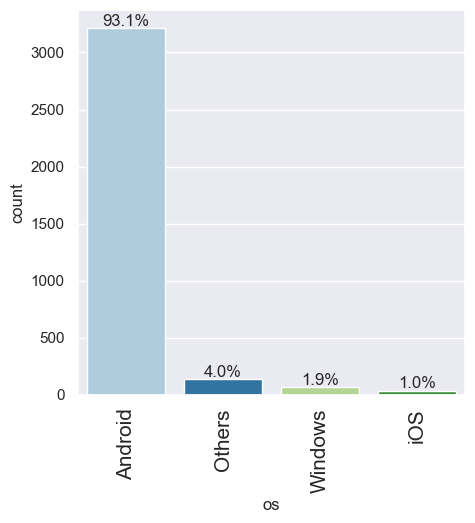

In [15]:
labeled_barplot(df, "os", perc=True)

More than 90% of the used phone market is dominated by andorid devices

In [16]:
df.loc[df.os=="Others", "os"] = "not_Android"
df.loc[df.os=="Windows", "os"] = "not_Android"
df.loc[df.os=="iOS", "os"] = "not_Android"

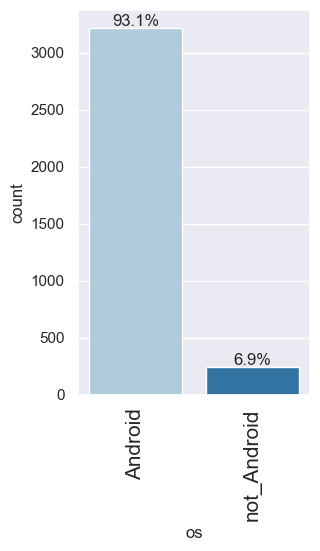

In [17]:
labeled_barplot(df, "os", perc=True)

### Distribution of RAM offered by different manufacturing brands


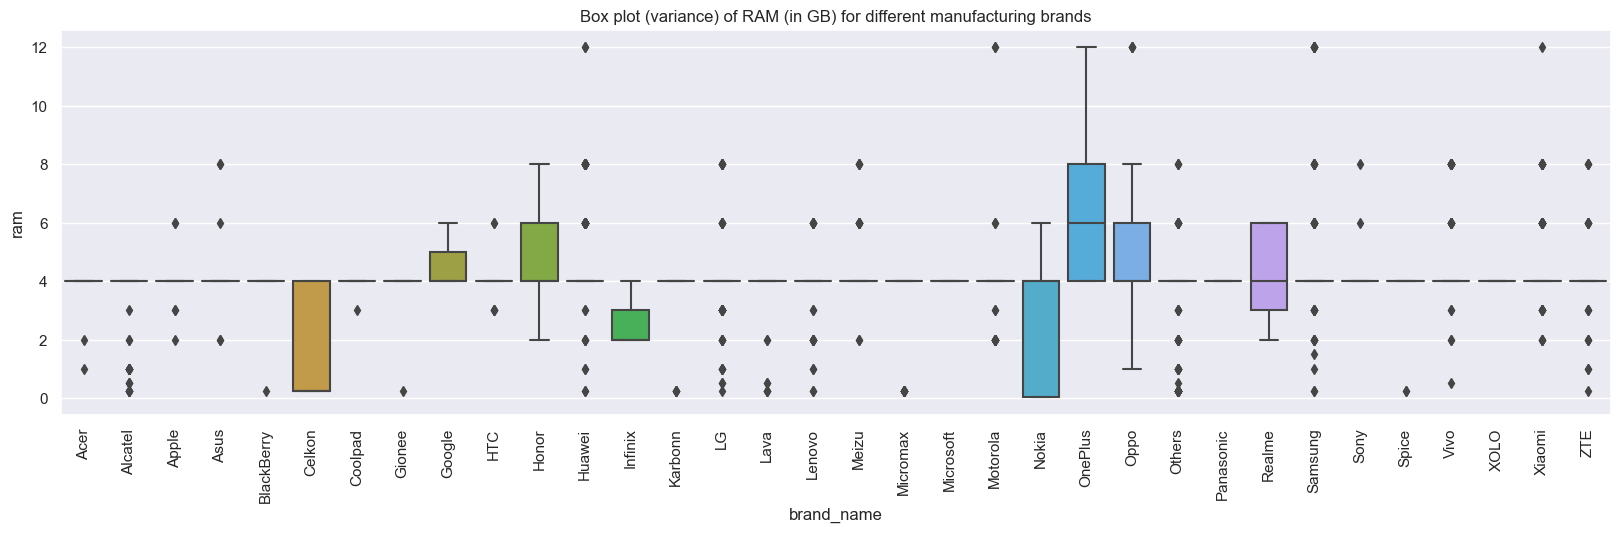

In [18]:
plt.figure(figsize=(20,5))

sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.title("Box plot (variance) of RAM (in GB) for different manufacturing brands")
plt.show()

The RAM distribution for several manufacturing brands shows low variance (spread) with a median of 4GB, resulting in an undefined "box"plot. However, there are still outliers with very high or very low RAM (in GB) values.

### Distribution of phones with large screen size (>6 inches) offered by different manufacturing brands

In [19]:
#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]
print(df_largescreen.shape)

(1099, 17)


There are 1099 refurbished phones with large screen size (i.e. >6 inches)

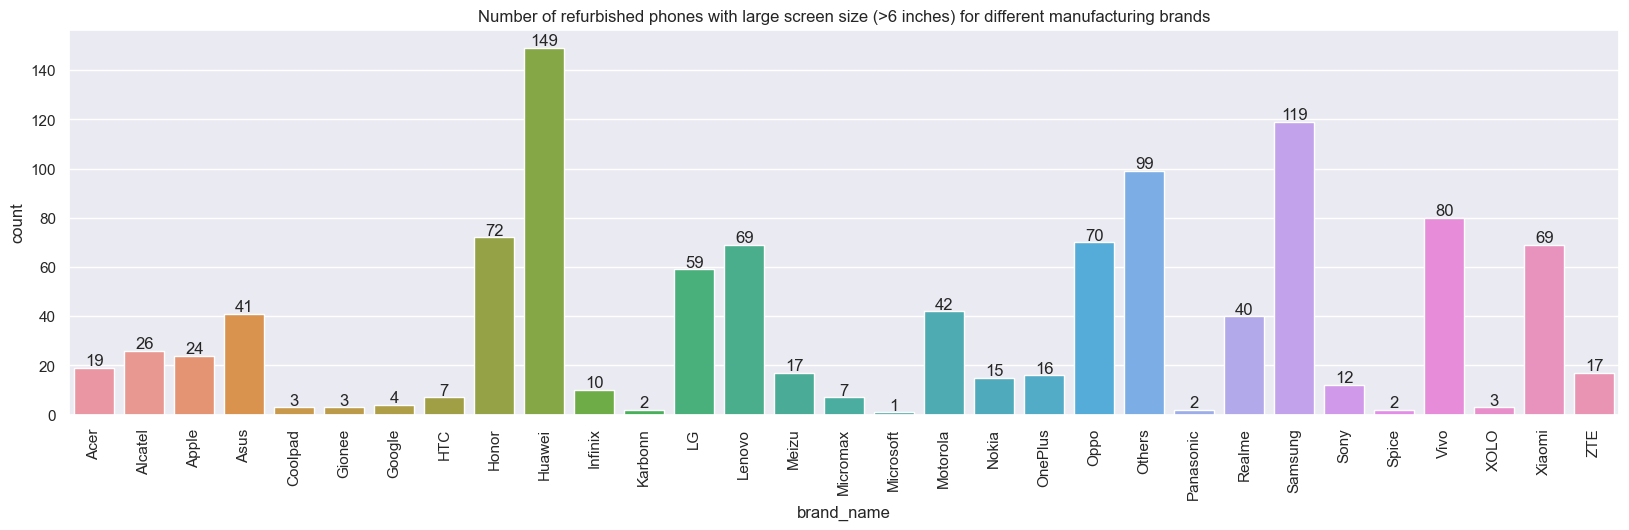

In [47]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(data=df_largescreen.sort_values("brand_name", ascending=True), x="brand_name")
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")

for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")

plt.show()


Huawei has the most refurbished phones with large screens (149), followed by Samsung, Vivo, Honor, Oppo, and Xiaomi . 

### Distributions of phones with great selfie camera (>8MP) offered by different manufacturing brands

In [21]:
df_greatselfiecamera = df[df["selfie_camera_mp"]>8]
print(df_greatselfiecamera.shape)

(655, 17)


There are 655 refurbished phones with great selfie cameras (i.e. > 8MP

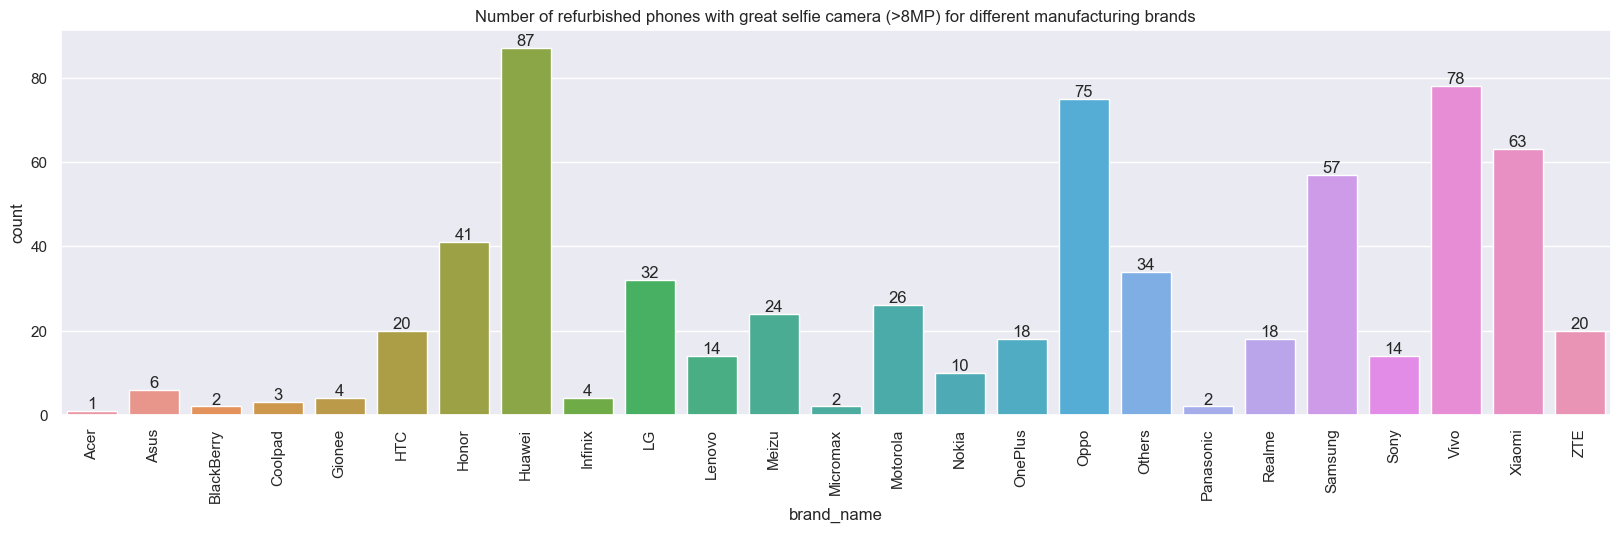

In [22]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

Huawei (87 phones), Vivo (78 phones),Oppo (75 phones) , Xiaomi (63 phones) and Samsung (57 phones) have some of the highest number of refurbished phones with a great selfie camera (>8MP) - similar brand names observed as for phones with large screen size

In [23]:
# We will now bucket the 34 manufacturing brands into 3 categories on the average price of a new phone 
# by that manufacturing brand i.e. 
# low_range  : <4.9
# mid_range  : 4.9-5.5
# high_range : >5.5

df.groupby("brand_name").mean()["normalized_new_price"].sort_values()

brand_name
Celkon        4.018319
Spice         4.453086
Micromax      4.513854
Karbonn       4.582536
Lava          4.586627
Infinix       4.655516
Nokia         4.668024
Alcatel       4.804302
XOLO          4.822616
Microsoft     4.963936
Panasonic     5.020892
Others        5.051192
Acer          5.077328
Realme        5.082650
Lenovo        5.138462
Coolpad       5.169676
Motorola      5.191796
ZTE           5.218665
LG            5.286666
BlackBerry    5.304419
Gionee        5.334537
Honor         5.349602
Xiaomi        5.364574
Asus          5.387590
HTC           5.452407
Meizu         5.462516
Samsung       5.482891
Huawei        5.515084
Sony          5.549278
Vivo          5.638037
Oppo          5.679682
Google        6.077932
OnePlus       6.266780
Apple         6.339548
Name: normalized_new_price, dtype: float64

In [24]:
df.loc[df.normalized_new_price>0, "brand_name"] = "low_range"
df.loc[df.normalized_new_price>=4.9, "brand_name"] = "mid_range"
df.loc[df.normalized_new_price>=5.5, "brand_name"] = "high_range"

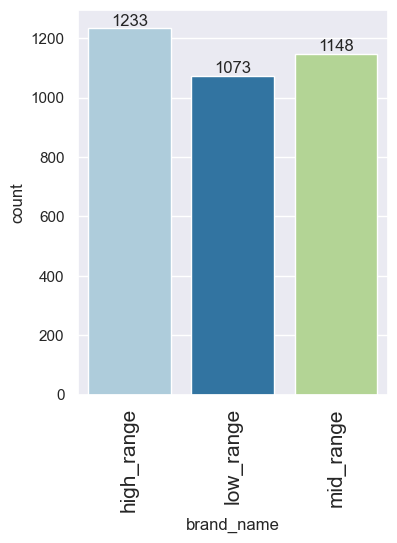

In [25]:
labeled_barplot(df, "brand_name")

There are now 3 manufacturing brand categories - low_range : 1073 refurbished phones, mid_range : 1148 refurbished phones and high_range : 1233 refurbished phones


### Relation between a phone's weight and battery for phone offering large batteries (more than 4500 mAh)

In [26]:
df_largebatteries = df[df["battery"]>4500]
print(df_largebatteries.shape)

(341, 17)


There are 341 refurbished phones with large batteries (i.e. >4500 mAh)

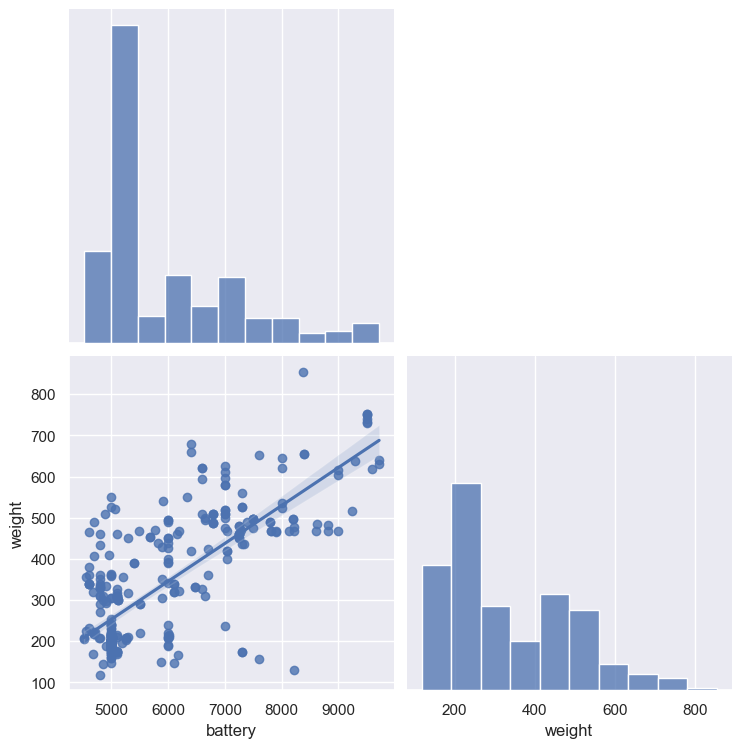

Linear correlation factor between phone's weight and battery 0.76


In [27]:
g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

We see a moderate correlation (0.76) between a phone's weight and battery drawing the conclusion that as the battery size increases, so does the weight

### Linear correlation between numerical attributes and used phone price

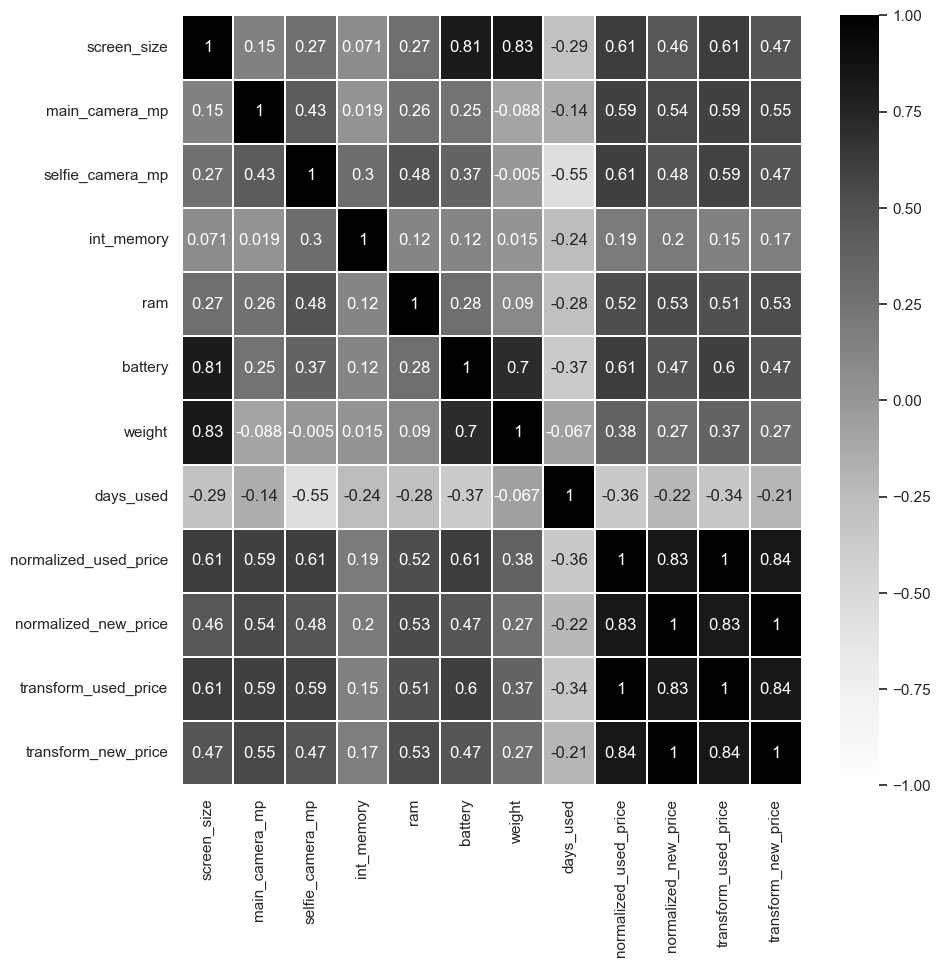

In [28]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Greys", linewidths=0.05);

The variables "normalized_used_price" and "cbrt(normalized_used_price)" have a negative correlation with "days_used".

There is a strong positive correlation between "normalized_used_price" and "normalized_new_price", as well as between "cbrt(normalized_used_price)" and "cbrt(normalized_new_price)".

The variables "normalized_used_price" and "cbrt(normalized_used_price)" have moderate positive correlations with "selfie_camera", "main_camera", "screen_size", and "battery". 

The correlation coefficients for "cbrt(normalized_used_price)" tend to be higher than those for "normalized_used_price".

"cbrt(normalized_used_price)" and "cbrt(normalized_new_price)" will be used as the variables of interest for modeling purposes, assuming that the normalization process is consistent and appropriate.

In [29]:
print(df.columns)

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'transform_used_price', 'transform_new_price'],
      dtype='object')


In [31]:
df.drop("normalized_used_price", axis=1, inplace=True, errors='ignore')
df.drop("normalized_new_price", axis=1, inplace=True, errors='ignore')

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [48]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp          179
selfie_camera_mp          2
int_memory                4
ram                       4
battery                   6
weight                    7
release_year              0
days_used                 0
transform_used_price      0
transform_new_price       0
dtype: int64

The dependent variable cbrt(normalized_used_price) does not have any missing values

In [51]:
medianFiller = lambda x:x.fillna(x.median())

brand_names = df["brand_name"].unique()
numeric_column = df.select_dtypes(include = np.number).columns.to_list()

# we will group by brand name (low-range, mid-range or high-range), and for each numeric column, we will replace 
# the missing value with the median value of the numeric column of the respective brand name 

for item in brand_names:
    df.loc[df.brand_name==item, numeric_column] = \
    df.loc[df.brand_name==item, numeric_column].apply(medianFiller, axis=0)


In [52]:
df.isnull().sum()

brand_name              0
os                      0
screen_size             0
4g                      0
5g                      0
main_camera_mp          0
selfie_camera_mp        0
int_memory              0
ram                     0
battery                 0
weight                  0
release_year            0
days_used               0
transform_used_price    0
transform_new_price     0
dtype: int64

All the missing values have been treated.

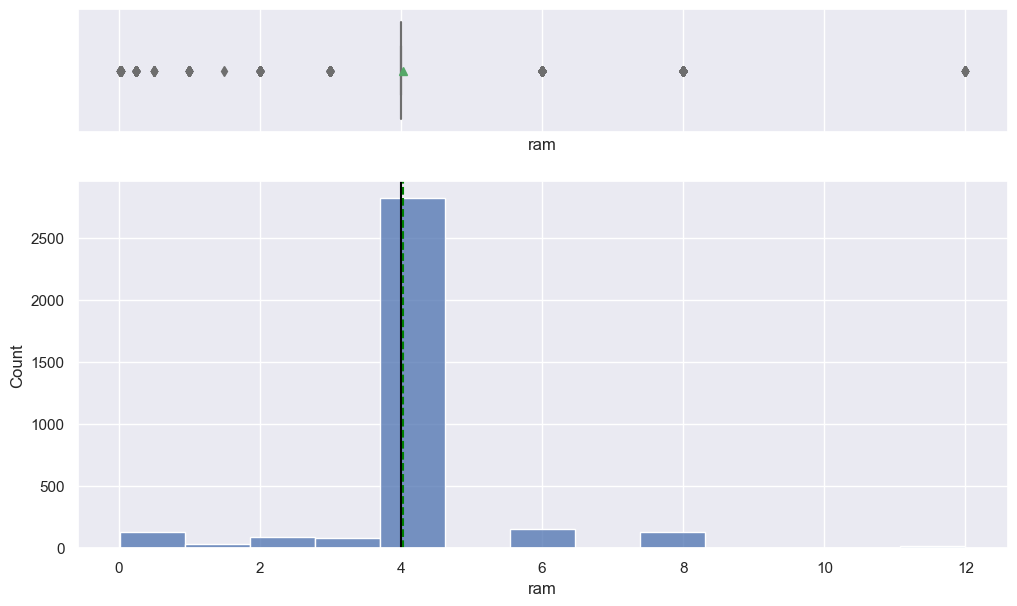

In [53]:
histogram_boxplot(df, "ram")

We will drop "RAM" column as majority of dataset has a constant RAM of 4GB with a few upper and lower outliers.

In [54]:
df.drop("ram", axis=1, inplace=True)

In [55]:
numeric_columns.remove("ram")
numeric_columns.remove("normalized_new_price")
numeric_columns.remove("normalized_used_price")

### Outlier detection and treatment

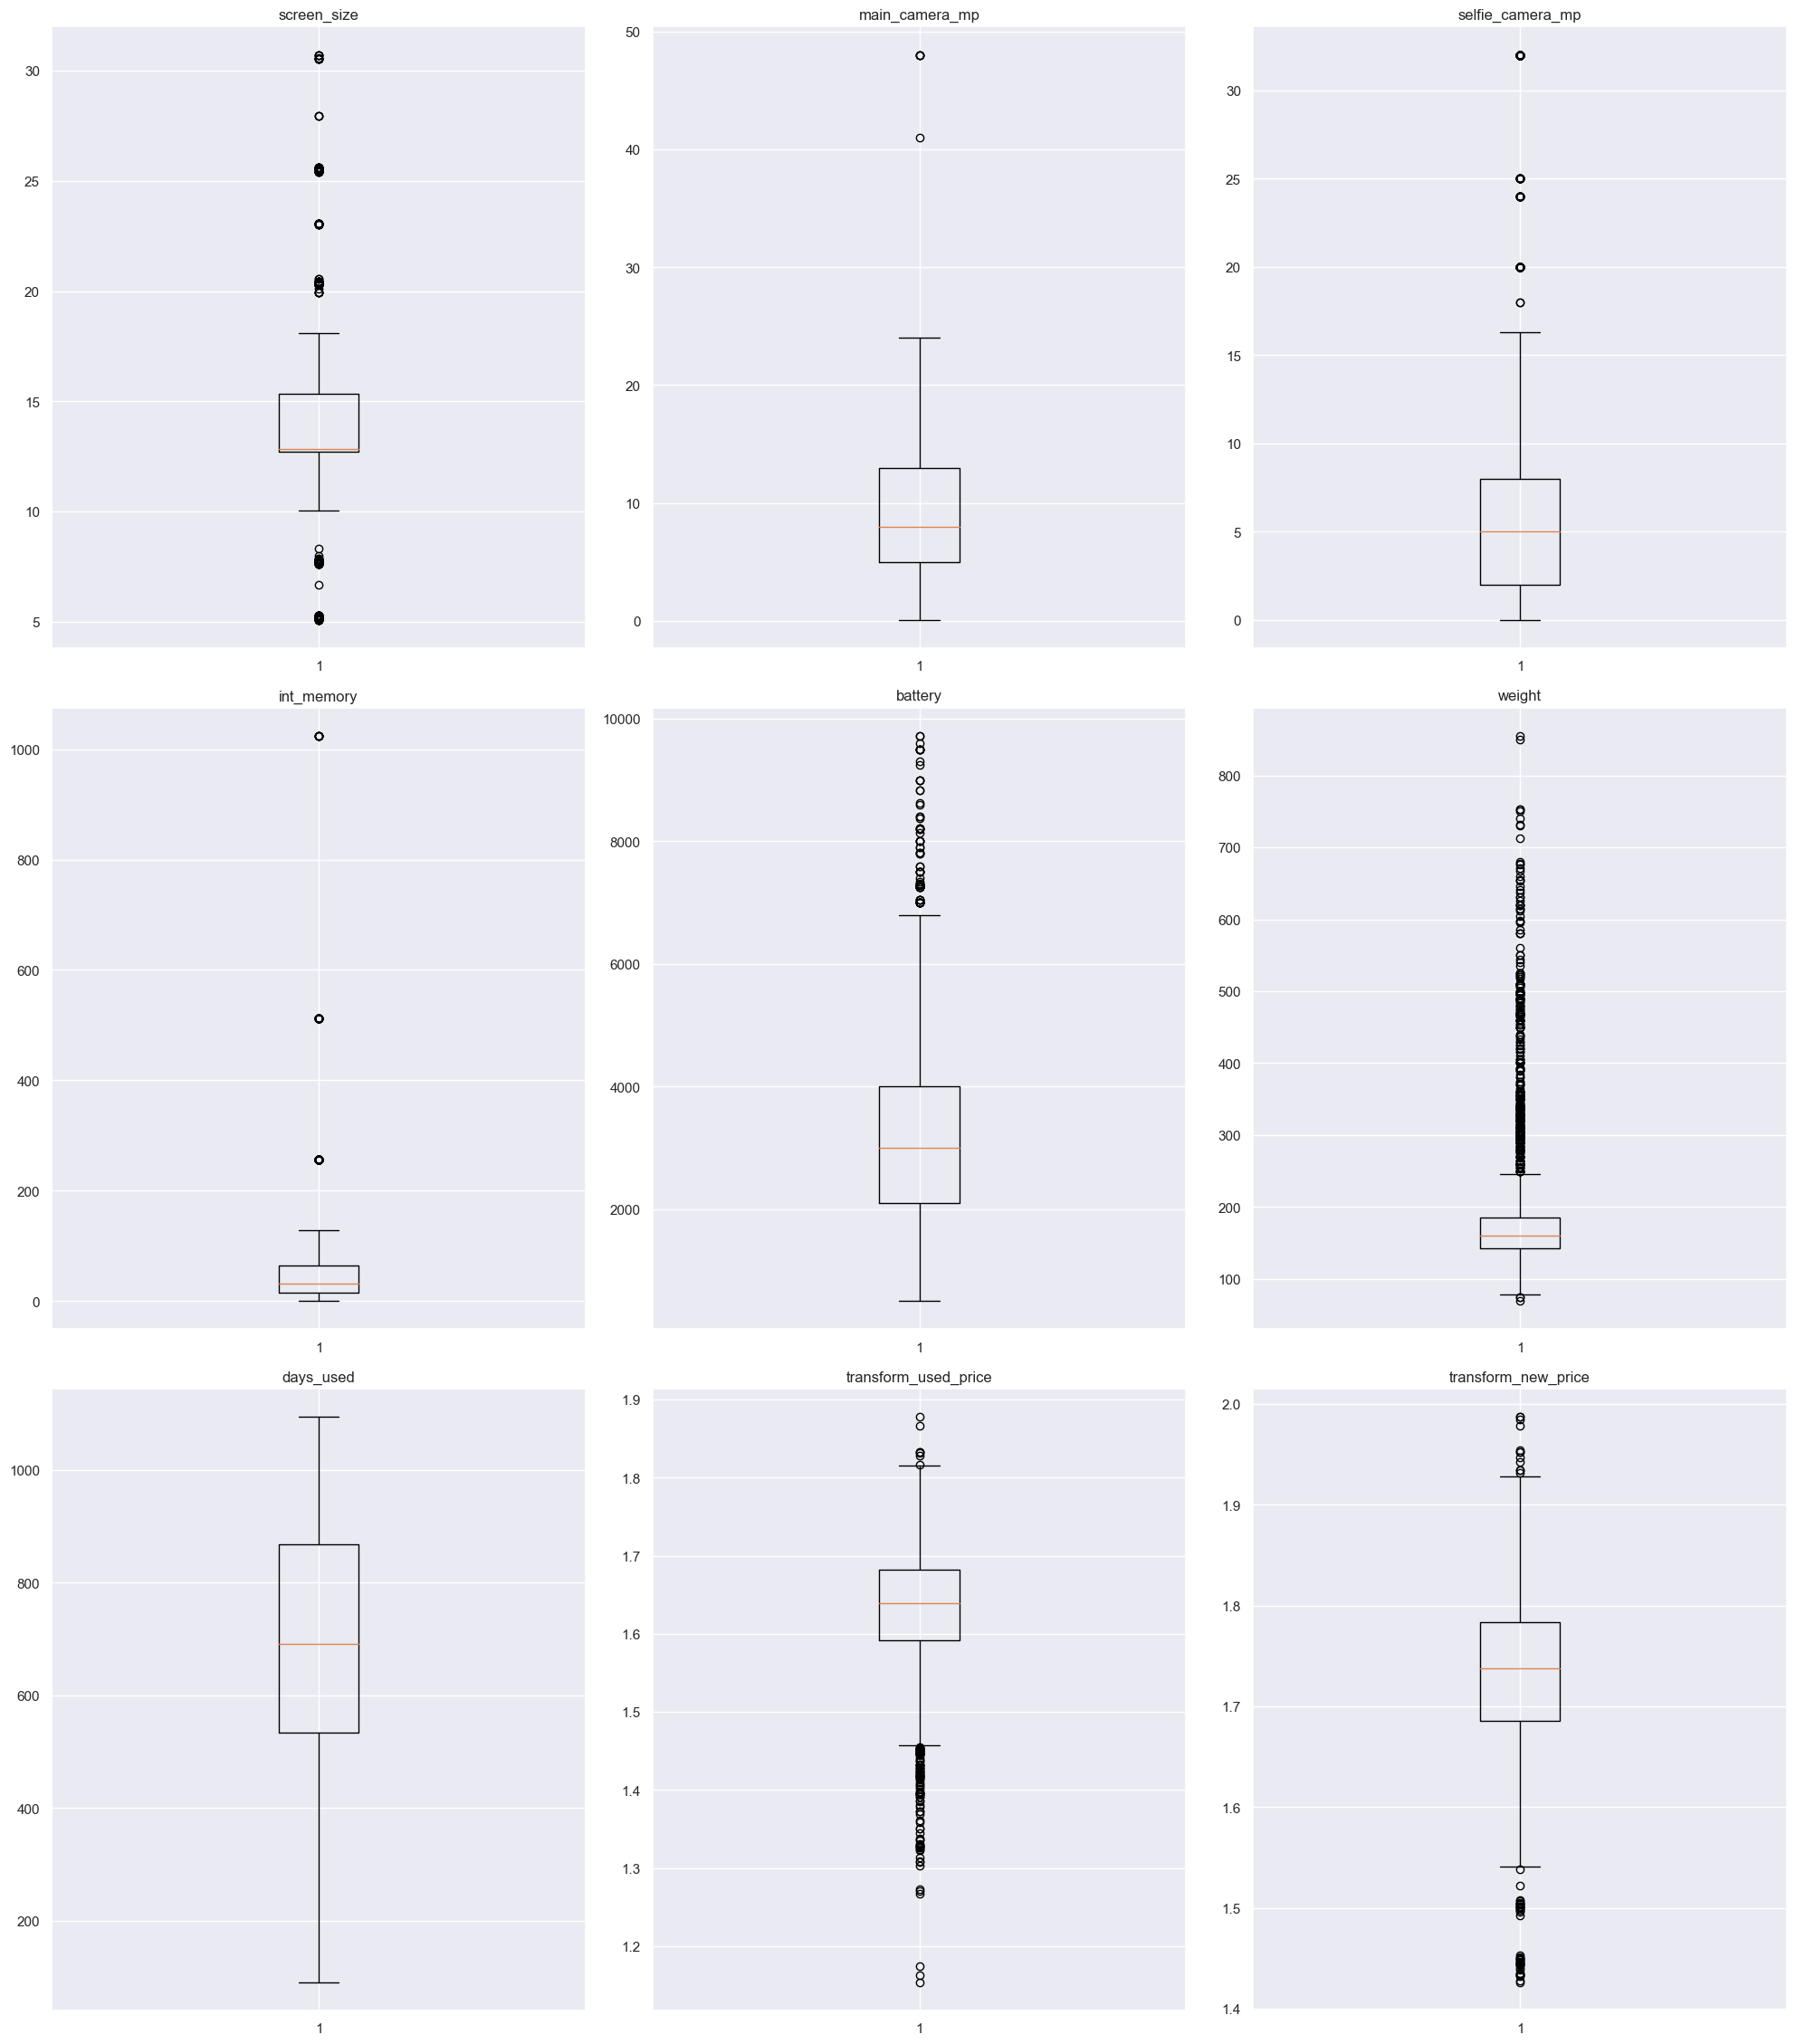

In [56]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are no outliers in the days_used column.

There are a few upper outliers in the main_camera_mp, selfie_camera_mp, int_memory and battery. There are more than a few lower and upper outliers in the screen_size and weight columns.

We will perform flooring and capping to remove these outliers and build our model.

In [57]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [58]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

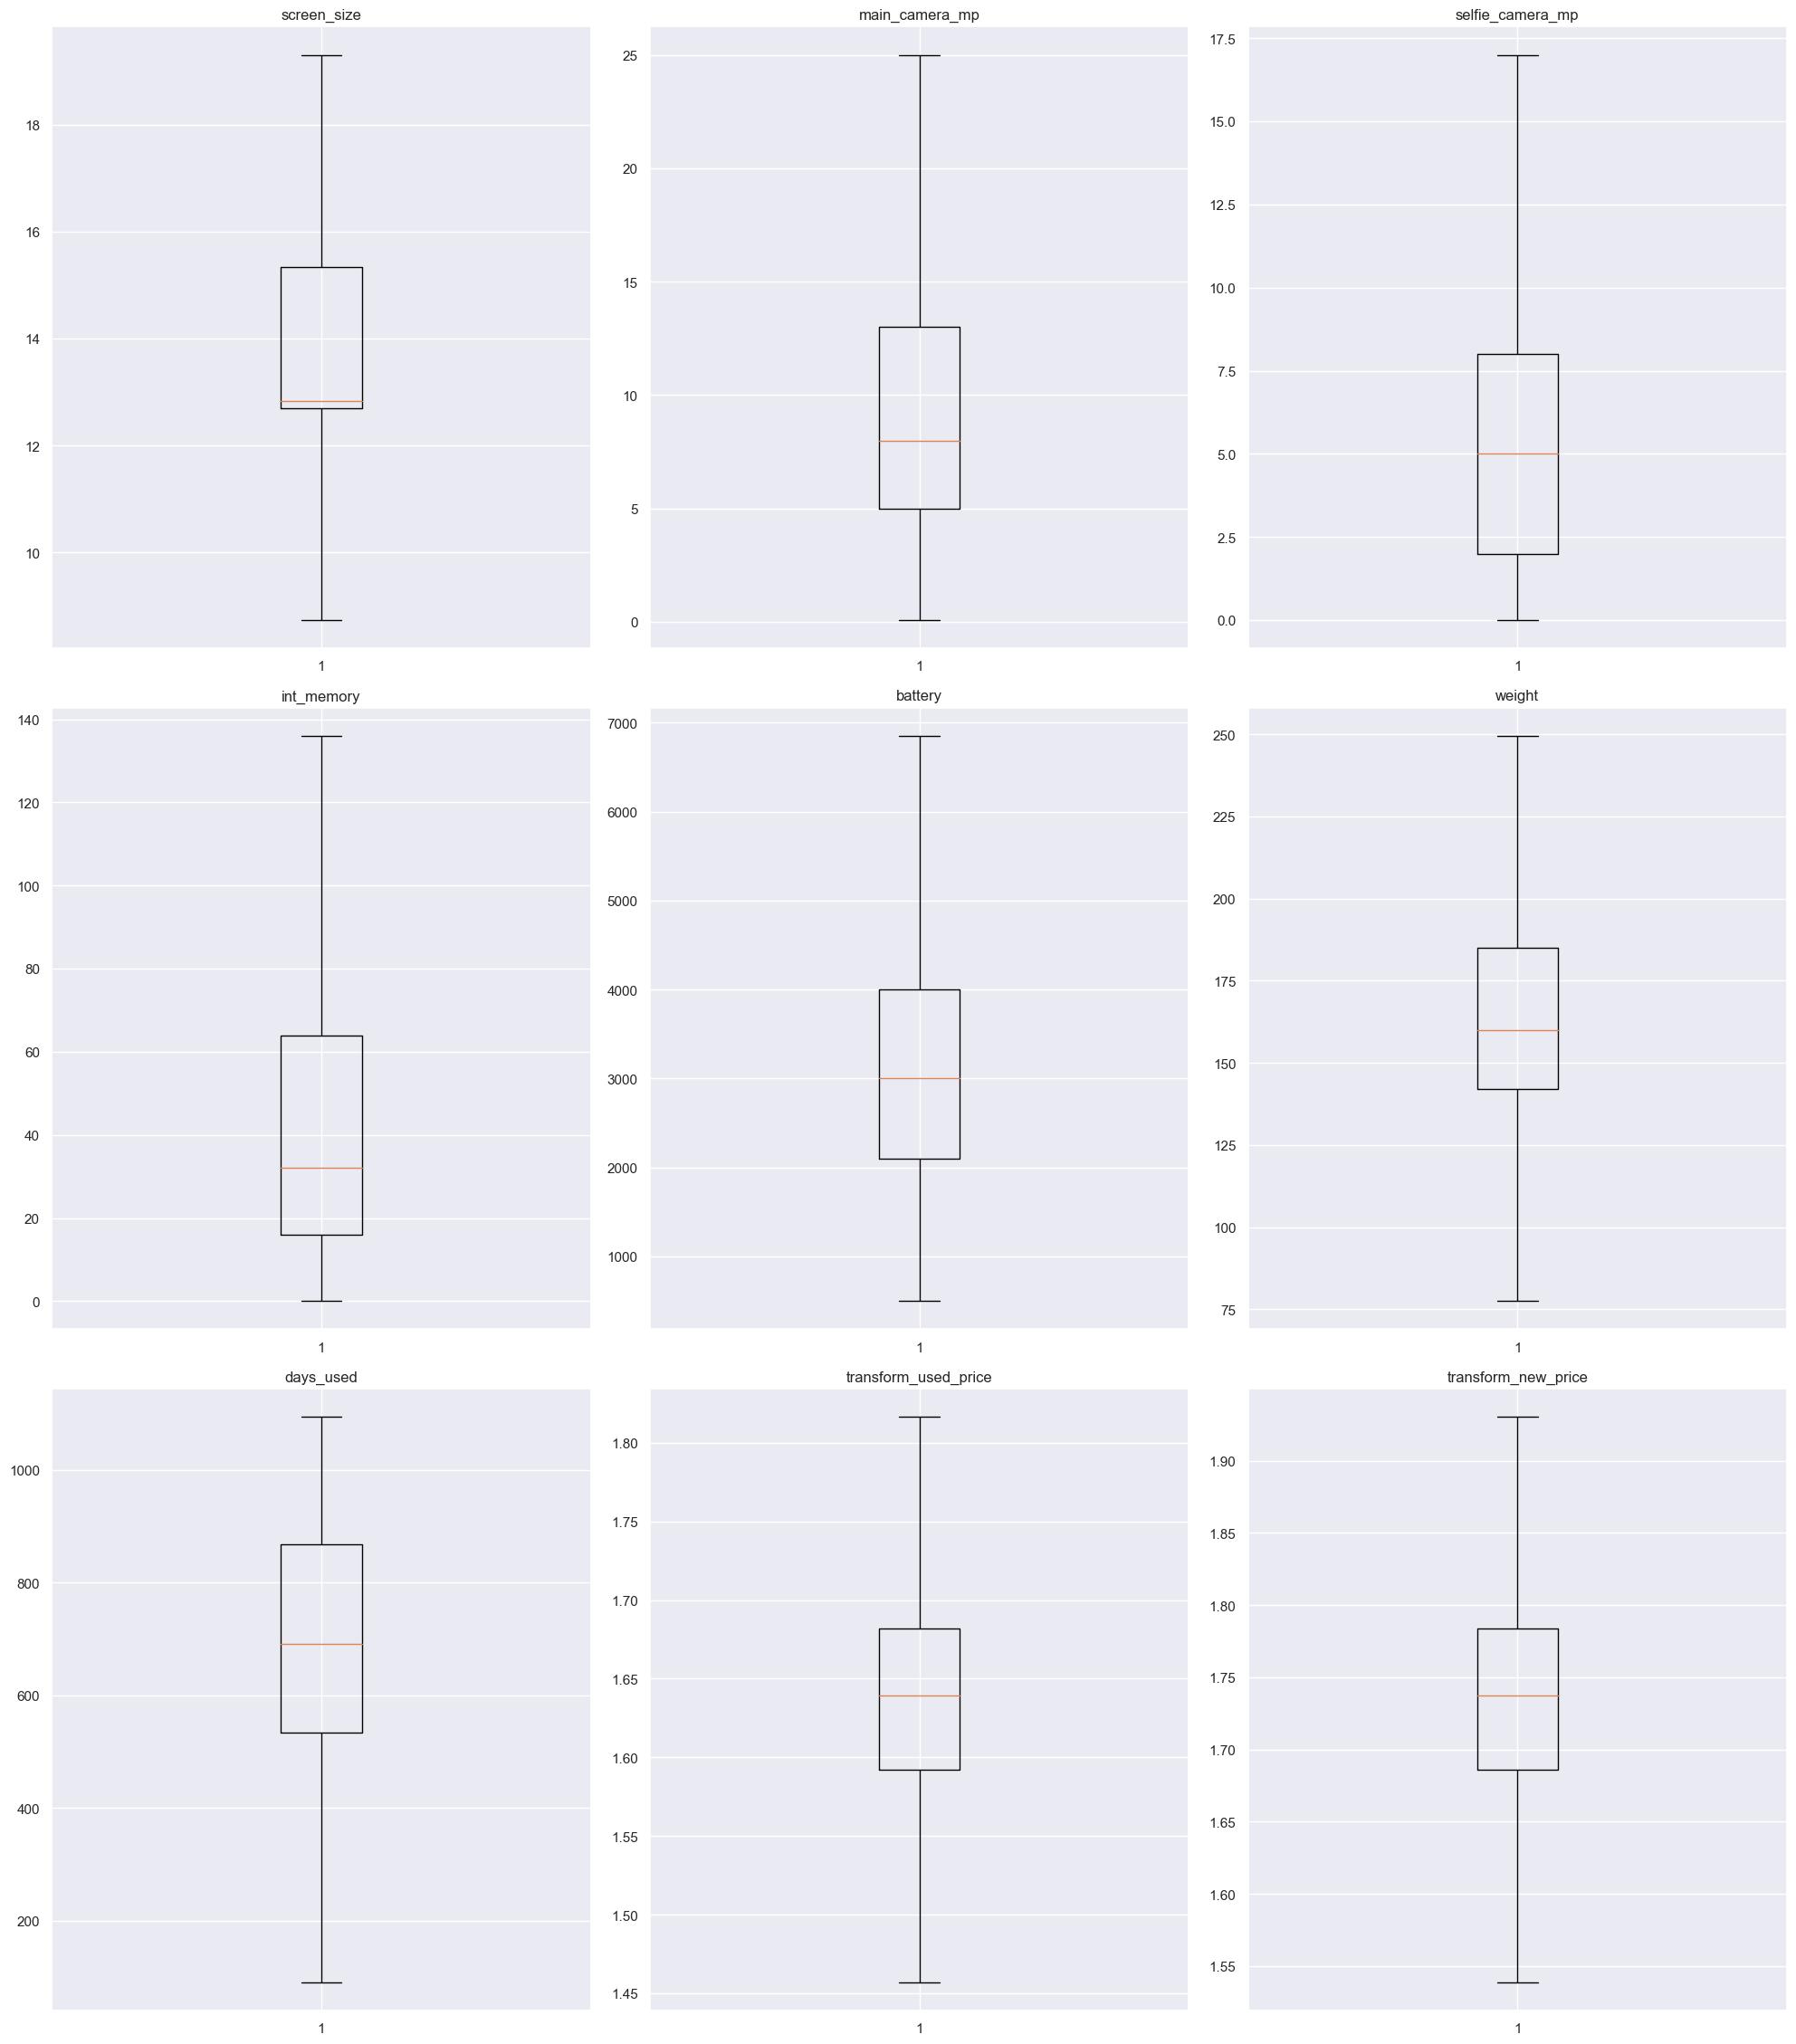

In [59]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

All outliers have been treated

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Reexamining the distribution of large-screen phones (>6 inches) with high-quality selfie cameras (>8MP) across various brands.

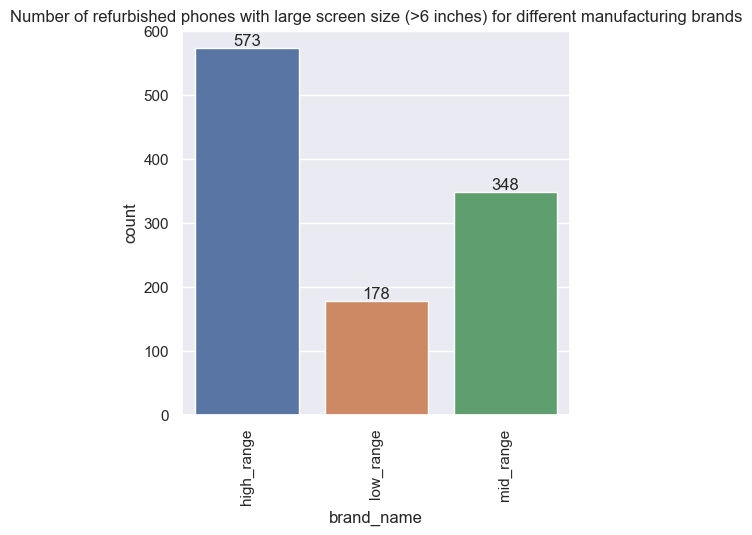

In [60]:
#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

High_range brands offer maximum number of refurbished phones with large screen size (573 phones), followed by mid_range brands (348 phones) and then low_range brands (178 phones).

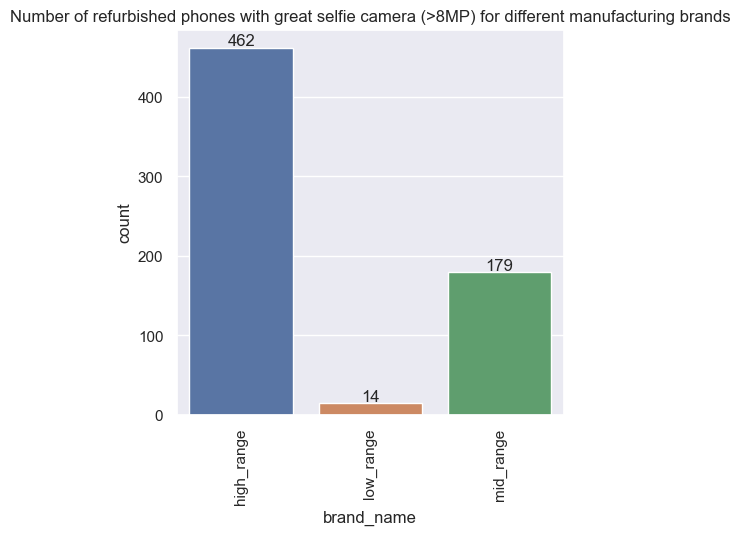

In [61]:
df_greatselfiecamera = df[df["selfie_camera_mp"]>8]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

High_range brands offer the maximum number of refurbished phones with great selfie_camera (462 phones), followed by mid_range brands (179 phones) and then low_range brands (14 phones)

### Reassessing the relationship between phone weight and battery capacity for devices with large batteries (>4500 mAh).

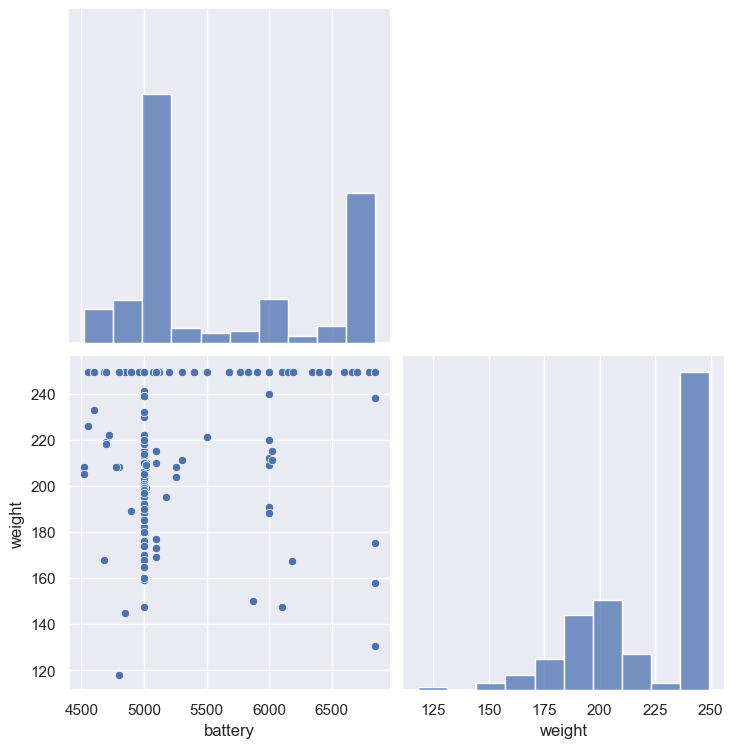

Linear correlation factor between phone's weight and battery 0.48


In [62]:
df_largebatteries = df[df["battery"]>4500]

g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True)
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

The linear correlation between a phone's weight and battery has dropped from 0.76 to 0.48 after outlier treatment, i.e., has become weaker

### Reanalyzing linear correlation between numerical attributes and used phone price

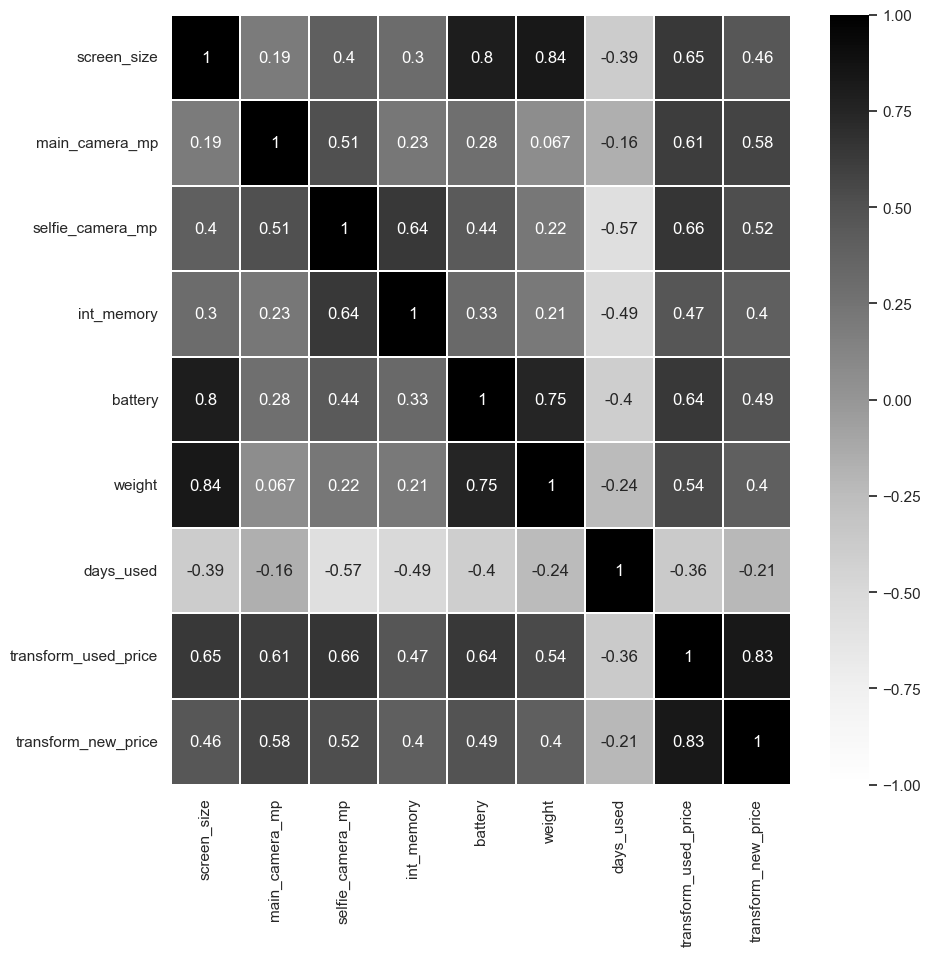

In [63]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Greys", linewidths=0.05);

the used price has become slightly more negatively correlated with the number of days used after outlier treatment, while the strong positive correlation between used and new prices remains unchanged.

## Model Building - Linear Regression

In [64]:
# defining X and y variables
X = df.drop(["transform_used_price", "release_year"], axis=1) # since year is a temporal variable
y = df["transform_used_price"]

print(X.head())
print(y.head())

   brand_name       os  screen_size   4g   5g  main_camera_mp  \
0   low_range  Android        14.50  yes   no            13.0   
1  high_range  Android        17.30  yes  yes            13.0   
2  high_range  Android        16.69  yes  yes            13.0   
3  high_range  Android        19.30  yes  yes            13.0   
4   mid_range  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0        127   
1              16.0       128.0   4300.0   213.0        325   
2               8.0       128.0   4200.0   213.0        162   
3               8.0        64.0   6850.0   249.5        345   
4               8.0        64.0   5000.0   185.0        293   

   transform_new_price  
0             1.676861  
1             1.767206  
2             1.805398  
3             1.779075  
4             1.704009  
0    1.627087
1    1.728259
2    1.722547
3    1.725273
4    1.637400
Name: tran

In [65]:
# encoding categorical variables

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()

(3454, 13)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,transform_new_price,brand_name_low_range,brand_name_mid_range,os_not_Android,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127,1.676861,1,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325,1.767206,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162,1.805398,0,0,0,1,1
3,19.30,13.0,8.0,64.0,6850.0,249.5,345,1.779075,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293,1.704009,0,1,0,1,0


In [66]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [67]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

### Checking the coefficients and intercept of the model

In [68]:
coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

,Coefficients
screen_size,5.581809e-03
main_camera_mp,2.890034e-03
selfie_camera_mp,2.150814e-03
int_memory,4.888718e-05
battery,2.205834e-06
weight,1.486369e-04
days_used,9.678610e-07
transform_new_price,5.080141e-01
brand_name_low_range,1.604958e-02
brand_name_mid_range,9.424201e-03


## Model Performance Check

metric functions defined in sklearn for RMSE, MAE, and R2.

user defined function to calculate MAPE and adjusted R2.

In [69]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, x_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.028,0.0221,0.84344,0.842593,1.361591


In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.027866,0.022371,0.841773,0.839762,1.375082


The training R2 is 0.84, indicating that the model explains approx. 84% of the variation in the train data. So, the model is not underfitting

MAE (0.022, 0.022) and RMSE (0.028, 0.027) on the train and test sets are comparable, which shows that the model is not overfitting

### Linear Regression using statsmodels

In [72]:
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.843
Model:                              OLS   Adj. R-squared:                  0.843
Method:                   Least Squares   F-statistic:                     995.8
Date:                  Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                          22:14:00   Log-Likelihood:                 5212.6
No. Observations:                  2417   AIC:                        -1.040e+04
Df Residuals:                      2403   BIC:                        -1.032e+04
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Variance Inflation Factor (VIF):

variance Inflation Factors (VIF) assess the increase in the variances of regression coefficient estimates due to the presence of collinearities among predictor variables.

Low multicollinearity: VIF values between 1 and 5 indicate a low degree of multicollinearity.

Moderate multicollinearity: VIF values ranging from 5 to 10 suggest a moderate level of multicollinearity.

High multicollinearity: VIF values exceeding 10 are indicative of a high degree of multicollinearity.

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [74]:
checking_vif(x_train1)

,feature,VIF
0,const,3112.724118
1,screen_size,5.094845
2,main_camera_mp,2.174658
3,selfie_camera_mp,3.059158
4,int_memory,2.032539
5,battery,3.573173
6,weight,4.367473
7,days_used,1.801991
8,transform_new_price,5.716016
9,brand_name_low_range,6.334477


The cbrt(transform_new_price) of a phone and  The brand_name_low_range has VIF above 5

### Removing Multicollinearity

To address multicollinearity:

Sequentially remove each column with a VIF score above 5.

Examine the adjusted R-squared and RMSE for all resulting models.

Eliminate the variable that leads to the smallest change in adjusted R-squared.

Reevaluate the VIF scores.

Repeat the process until all VIF scores are below 5.

In [80]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [81]:
col_list = ["transform_new_price","brand_name_low_range"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_low_range,0.840888,0.028233
1,transform_new_price,0.792042,0.032277


In [82]:
col_to_drop = "brand_name_low_range"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_low_range


,variables,VIF
0,const,968.057138
1,screen_size,5.084250
2,main_camera_mp,2.160045
3,selfie_camera_mp,3.041179
4,int_memory,2.030506
5,battery,3.543685
6,weight,4.366890
7,days_used,1.787013
8,transform_new_price,2.261653
9,brand_name_mid_range,1.074121


In [87]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.834
Model:                              OLS   Adj. R-squared:                  0.833
Method:                   Least Squares   F-statistic:                     1006.
Date:                  Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                          22:49:09   Log-Likelihood:                 5141.3
No. Observations:                  2417   AIC:                        -1.026e+04
Df Residuals:                      2404   BIC:                        -1.018e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

In [88]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'battery', 'weight', 'transform_new_price', 'brand_name_low_range', 'brand_name_mid_range', '4g_yes']


In [89]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [90]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.834
Model:                              OLS   Adj. R-squared:                  0.833
Method:                   Least Squares   F-statistic:                     1341.
Date:                  Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                          22:51:39   Log-Likelihood:                 5139.7
No. Observations:                  2417   AIC:                        -1.026e+04
Df Residuals:                      2407   BIC:                        -1.020e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

### TEST FOR LINEARITY AND INDEPENDENCE

Make a plot of fitted values vs residuals
If they don't follow any pattern, then we say the model is linear and residuals are independent
Otherwise, the model is showing signs of non-linearity and residuals are not independent

In [91]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,1.621326,1.627315,-0.005989
3141,1.610241,1.576597,0.033644
1233,1.602783,1.639420,-0.036637
3046,1.558105,1.572409,-0.014304
2649,1.585006,1.579612,0.005394


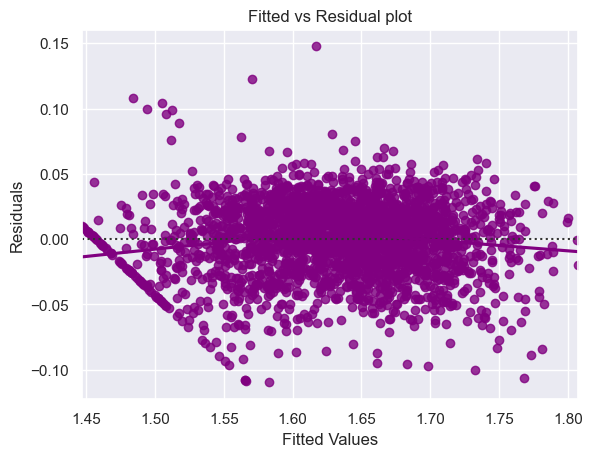

In [92]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

The pattern may indicate that the model has some non linear dependancies and may be improved by transforming the columns or better defined by non-linear models

### TEST FOR NORMALITY

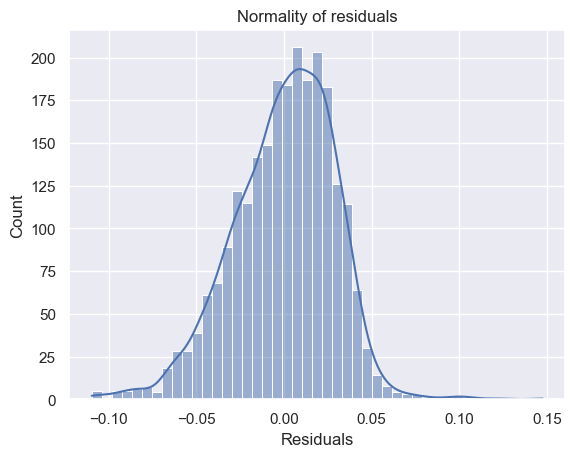

In [93]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

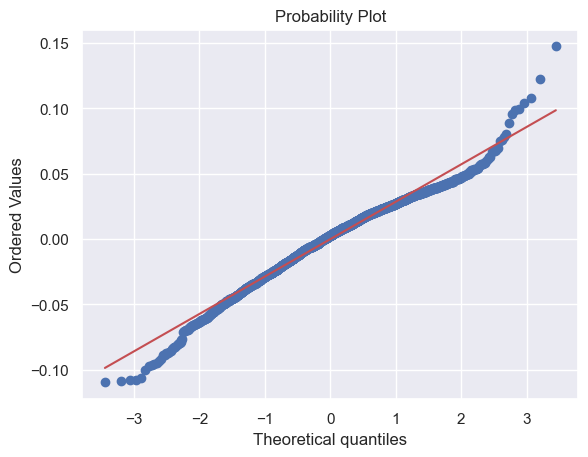

In [94]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [95]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9827219247817993, pvalue=1.4738026528112044e-16)

as an approximation, we can accept this distribution as close to being normal

### TEST FOR HOMOSCEDASTICITY

Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.



In [96]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.9894309501753195), ('p-value', 0.5729436676478803)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied

## Final Model

In [97]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1174,4.553772,4.425181
2247,4.330996,4.024937
2991,4.180828,4.015615
2997,4.291007,4.336633
2982,4.649761,4.660638
479,4.284689,4.234796
17,4.777020,4.837980
471,4.721886,4.441632
2918,4.482550,4.461177
602,3.852485,4.107330


We can observe here that our model has returned good prediction results, and the actual and predicted (used_price) are comparable, although there is further scope for improvement.

We can also visualize comparison result as a bar graph.

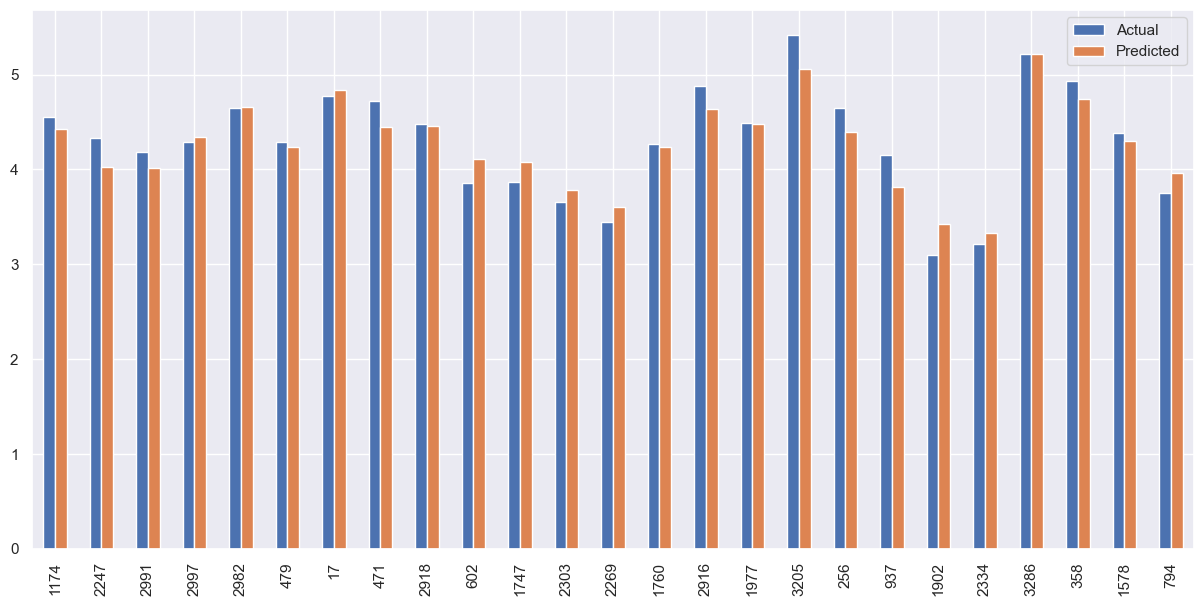

In [98]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [99]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.028857,0.022755,0.833707,0.833016,1.402249


In [100]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.028331,0.02276,0.836447,0.834853,1.400299


The model is able to explain ~83% of the variation in the data.

The train and test RMSE and MAE (~0.28 and ~0.22) are low and comparable. So, our model is not suffering from overfitting.

The MAPE on the test set suggests we can predict within 1.4%.

### Comparing the initial model created with sklearn and the final statsmodels model

In [102]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.028000,0.028857
MAE,0.022100,0.022755
R-squared,0.843440,0.833707
Adj. R-squared,0.842593,0.833016
MAPE,1.361591,1.402249


In [103]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.027866,0.028331
MAE,0.022371,0.022760
R-squared,0.841773,0.836447
Adj. R-squared,0.839762,0.834853
MAPE,1.375082,1.400299


The performance of the two models is close to each other

### Recreating the final statsmodels model and printing it's summary to gain insights.

In [104]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.834
Model:                              OLS   Adj. R-squared:                  0.833
Method:                   Least Squares   F-statistic:                     1341.
Date:                  Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                          00:22:12   Log-Likelihood:                 5139.7
No. Observations:                  2417   AIC:                        -1.026e+04
Df Residuals:                      2407   BIC:                        -1.020e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

## Actionable Insights and Recommendations 

- INSIGHTS:

Newly released phones have a high used price, which is reasonable because the newer the phone, the higher the new price, which in turn affects the used price. Older phones tend to have a lower used price since most customers prefer phones in demand.

Factors such as release_year, days_used, new_price, brand_name_Gionee, and whether a phone is 4g or 5g appear to influence the used price. As expected, the longer a phone is used, the harder it is to determine its originality and condition, leading to a decrease in used price. 5g-enabled phones, being newer models, tend to have higher used prices.

Phones with 4g capability and Gionee brand phones have lower used prices. These models seem to be less in demand among customers and may need to be reconsidered.

- RECOMMENDATIONS:

The model can be used to make predictions of used phone prices. Focus should be placed on newly released phones, as they have a high resale value. 5g network-enabled phones should be prioritized over 4g phones, such as Gionee phones. It is recommended to consider discontinuing Gionee phones.

Future data collection efforts should consider the age of customers purchasing products, as age could be a major driver. Millennial customers may be more inclined to choose 5g-enabled or newer phone models.

Additionally, future data collection on customer income could help identify the preferences of high-income customers. This information would help businesses target their offerings more effectively.


___